In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ast
import os
import matplotlib.colors as mcolors
import cv2
import matplotlib.patches as patches

## Dataset Antigo

In [68]:
# Ler o csv 'concerta_2024-09-19.csv'
data1 = pd.read_csv('concerta_1a_formacao.csv')
data1['time'] = pd.to_datetime(data1['time'], format='mixed')
print(data1.shape)

(167640, 12)


## Dataset Novo

In [69]:
# Ler o csv 'concerta_2024-09-19.csv'
data2 = pd.read_csv('concerta_2024-09-30_tratado.csv')
data2['datetime'] = pd.to_datetime(data2['datetime'], format='mixed')
print(data2.shape)

(149642, 52)


### Comparar Engagement

### 1ª Formação

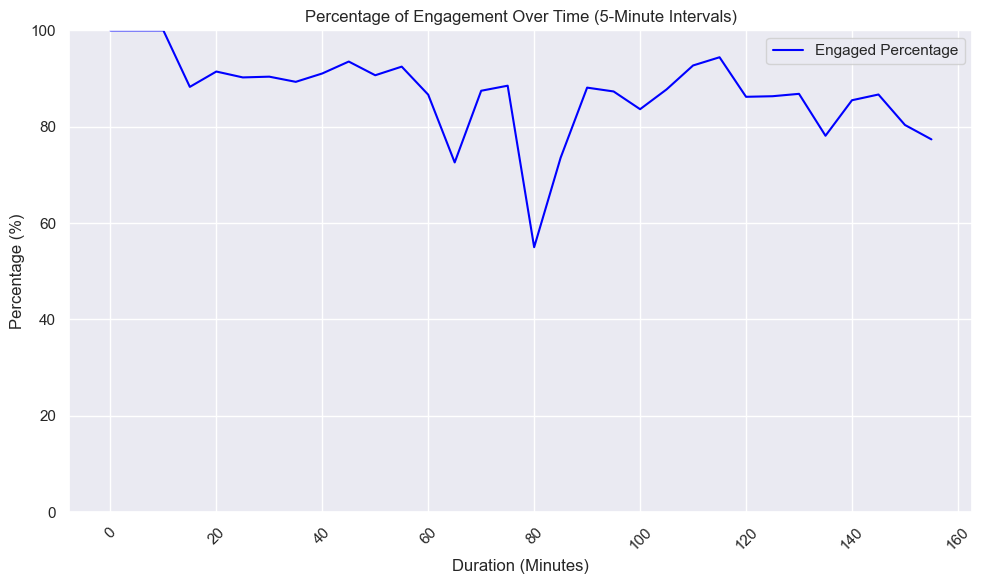

In [70]:
data1['5min'] = data1['time'].dt.floor('5min')
total_counts_5min = data1.groupby('5min').size().reset_index(name='total_counts')

engaged_count_5min = data1.groupby(['5min', 'engaged']).size().reset_index(name='counts')
engaged_count_5min = engaged_count_5min.merge(total_counts_5min, on='5min')
engaged_count_5min['percentage'] = (engaged_count_5min['counts'] / engaged_count_5min['total_counts']) * 100

# Calcula a duração em minutos a partir do início
data1['5min'] = data1['time'].dt.floor('5min')
start_time = data1['5min'].min()

# Adiciona coluna com duração em minutos
engaged_count_5min['duration_minutes'] = (engaged_count_5min['5min'] - start_time).dt.total_seconds() / 60

# Filtra apenas os dados de engajamento 'yes'
engaged_yes1 = engaged_count_5min[engaged_count_5min['engaged'] == 'yes']

# Criação do gráfico com duração em minutos no eixo X
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=engaged_yes1, 
    x='duration_minutes', 
    y='percentage', 
    color="blue", 
    label='Engaged Percentage'
)

plt.title('Percentage of Engagement Over Time (5-Minute Intervals)')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title=None)
plt.tight_layout()
plt.show()


### 2ª Formação

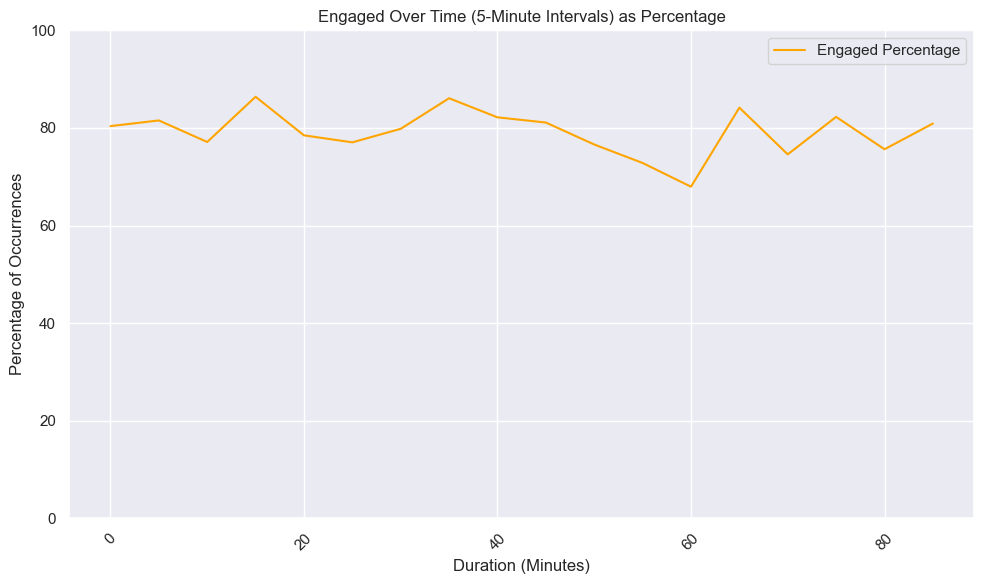

In [71]:
data2['5min'] = data2['datetime'].dt.floor('5min')
total_counts_5min = data2.groupby('5min').size().reset_index(name='total_counts')

engaged_count_5min = data2.groupby(['5min', 'engaged']).size().reset_index(name='counts')
engaged_count_5min = engaged_count_5min.merge(total_counts_5min, on='5min')
engaged_count_5min['percentage'] = (engaged_count_5min['counts'] / engaged_count_5min['total_counts']) * 100


# Calcula a duração em minutos a partir do início
start_time = data2['5min'].min()
engaged_count_5min['duration_minutes'] = (engaged_count_5min['5min'] - start_time).dt.total_seconds() / 60

# Filtrar apenas os dados de 'yes' para engajamento
engaged_yes2 = engaged_count_5min[engaged_count_5min['engaged'] == 'yes']

# Plotar o gráfico
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=engaged_yes2, 
    x='duration_minutes', 
    y='percentage', 
    label='Engaged Percentage', 
    color='orange'
)

plt.title('Engaged Over Time (5-Minute Intervals) as Percentage')
plt.ylabel('Percentage of Occurrences', fontsize=12)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title=None)
plt.tight_layout()
plt.show()



## Unir Gráficos

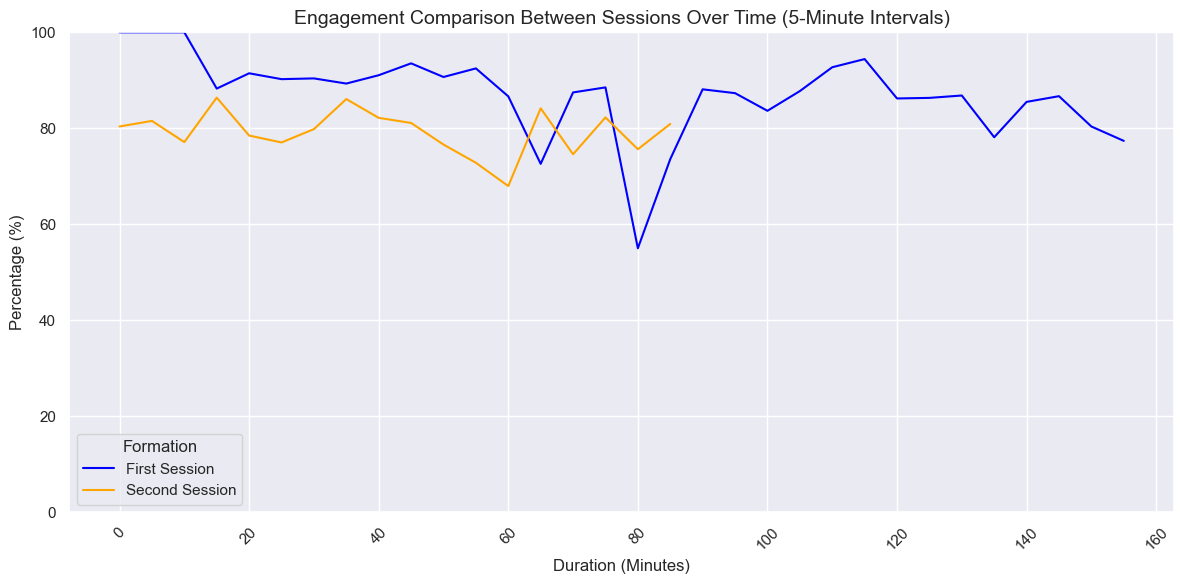

In [74]:
# Configuração do estilo do gráfico
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))

# # Gráfico da primeira formação (data1)
sns.lineplot(
    data=engaged_yes1, 
    x='duration_minutes', 
    y='percentage', 
    color="blue", 
    label='First Session'
)

# Gráfico da segunda formação (data2)
sns.lineplot(
    data=engaged_yes2,  # Segundo dataset
    x='duration_minutes', 
    y='percentage', 
    color="orange", 
    label='Second Session'
)

# Configurações do gráfico
plt.title('Engagement Comparison Between Sessions Over Time (5-Minute Intervals)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title='Formation')
plt.tight_layout()
plt.show()
